In [9]:
import pandas as pd

In [10]:
df_Unrate = pd.read_csv('UNRATE.csv')
df_jtsjol = pd.read_csv('JTSJOL.csv')
df_civpart = pd.read_csv('CIVPART.csv')
df_icsa = pd.read_csv('fredgraph.csv')
df_payems = pd.read_csv('PAYEMS.csv')

In [11]:
df_Unrate.head()

,observation_date,UNRATE
0,2000-12-01,3.9
1,2001-01-01,4.2
2,2001-02-01,4.2
3,2001-03-01,4.3
4,2001-04-01,4.4


In [12]:
df_jtsjol.head()

,observation_date,JTSJOL
0,2000-12-01,5088
1,2001-01-01,5234
2,2001-02-01,5097
3,2001-03-01,4762
4,2001-04-01,4615


In [13]:
df_civpart.head()

,observation_date,CIVPART
0,2000-12-01,67.0
1,2001-01-01,67.2
2,2001-02-01,67.1
3,2001-03-01,67.2
4,2001-04-01,66.9


In [14]:
df_icsa.head()

,observation_date,ICSA,ICNSA,CCSA,CCNSA
0,2000-12-02,338000,447262,2229000.0,2211195.0
1,2000-12-09,321000,390088,2263000.0,2315331.0
2,2000-12-16,354000,402476,2322000.0,2356340.0
3,2000-12-23,364000,481720,2340000.0,2525315.0
4,2000-12-30,353000,568973,2378000.0,2983919.0


In [15]:
df_payems.head()

,observation_date,PAYEMS
0,2000-12-01,132716
1,2001-01-01,132703
2,2001-02-01,132788
3,2001-03-01,132751
4,2001-04-01,132457


In [16]:
import pandas as pd
df_Unrate['observation_date'] = pd.to_datetime(df_Unrate['observation_date'])
df_jtsjol['observation_date'] = pd.to_datetime(df_jtsjol['observation_date'])
df_civpart['observation_date'] = pd.to_datetime(df_civpart['observation_date'])
df_icsa['observation_date'] = pd.to_datetime(df_icsa['observation_date'])
df_payems['observation_date'] = pd.to_datetime(df_payems['observation_date'])

In [17]:
print(df_Unrate.shape, df_jtsjol.shape, df_civpart.shape, df_icsa.shape, df_payems.shape)

(294, 2) (293, 2) (294, 2) (1282, 5) (294, 2)


In [18]:
#inorder to perform the resampling we need to make the date column as index column
df_icsa.set_index('observation_date', inplace=True)
df_icsa.head()


,ICSA,ICNSA,CCSA,CCNSA
observation_date,,,,
2000-12-02,338000,447262,2229000.0,2211195.0
2000-12-09,321000,390088,2263000.0,2315331.0
2000-12-16,354000,402476,2322000.0,2356340.0
2000-12-23,364000,481720,2340000.0,2525315.0
2000-12-30,353000,568973,2378000.0,2983919.0


In [19]:
#making the data from weekly to montly wise
df_icsa = df_icsa.resample('MS').sum().reset_index()
print(df_icsa.head())

  observation_date     ICSA    ICNSA        CCSA       CCNSA
0       2000-12-01  1730000  2290519  11532000.0  12392100.0
1       2001-01-01  1360000  2003904   9583000.0  11898894.0
2       2001-02-01  1485000  1524279   9946000.0  12009066.0
3       2001-03-01  1936000  1771316  12927000.0  14706259.0
4       2001-04-01  1587000  1467839  10789000.0  10892973.0


In [20]:
df = df_Unrate.merge(df_jtsjol, on = 'observation_date', how = 'outer').merge(df_civpart, on='observation_date', how = 'outer').merge(df_icsa, on='observation_date', how = 'outer').merge(df_payems, on='observation_date', how = 'outer')
df.head()

,observation_date,UNRATE,JTSJOL,CIVPART,ICSA,ICNSA,CCSA,CCNSA,PAYEMS
0,2000-12-01,3.9,5088.0,67.0,1730000,2290519,11532000.0,12392100.0,132716.0
1,2001-01-01,4.2,5234.0,67.2,1360000,2003904,9583000.0,11898894.0,132703.0
2,2001-02-01,4.2,5097.0,67.1,1485000,1524279,9946000.0,12009066.0,132788.0
3,2001-03-01,4.3,4762.0,67.2,1936000,1771316,12927000.0,14706259.0,132751.0
4,2001-04-01,4.4,4615.0,66.9,1587000,1467839,10789000.0,10892973.0,132457.0


In [21]:
df.isna().sum()

observation_date    0
UNRATE              1
JTSJOL              2
CIVPART             1
ICSA                0
ICNSA               0
CCSA                0
CCNSA               0
PAYEMS              1
dtype: int64

In [22]:
#handling the missing values using interpolation
df.interpolate(method='linear',inplace=True)

In [23]:
df.isna().sum()

observation_date    0
UNRATE              0
JTSJOL              0
CIVPART             0
ICSA                0
ICNSA               0
CCSA                0
CCNSA               0
PAYEMS              0
dtype: int64

In [24]:
#Identifying the duplicate values
df.duplicated().sum()

np.int64(0)

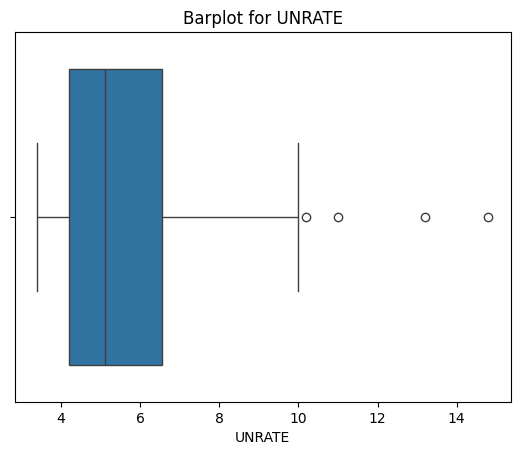

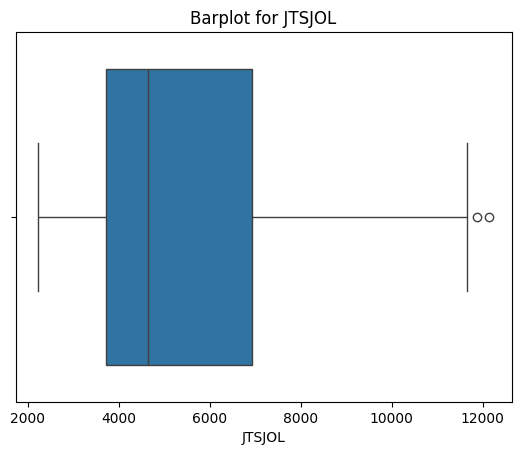

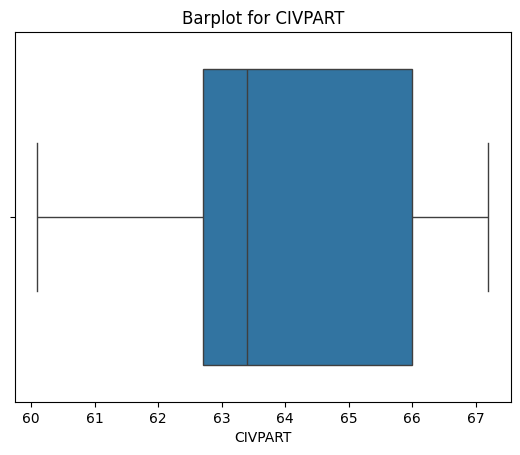

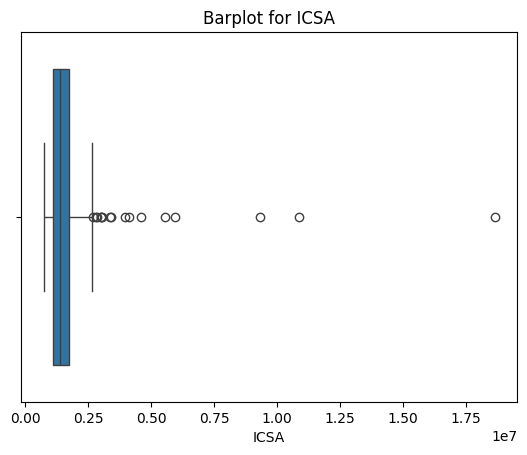

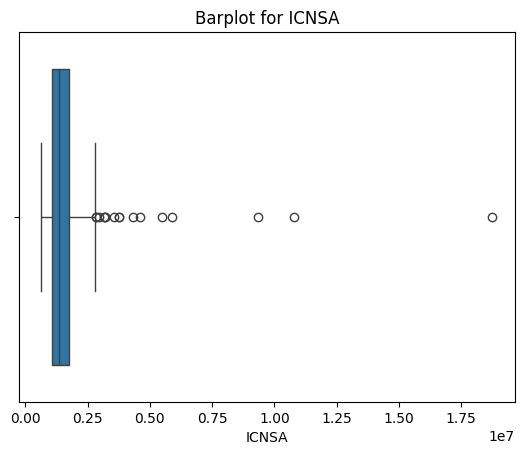

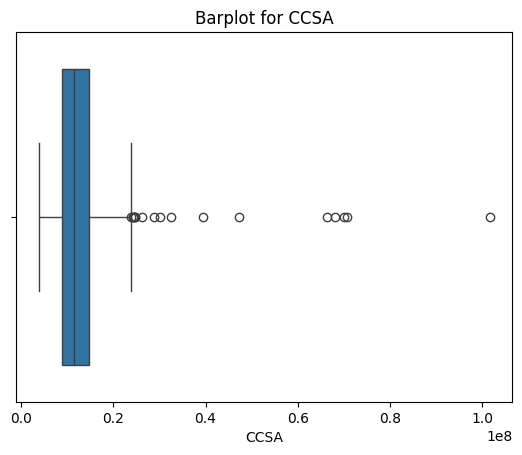

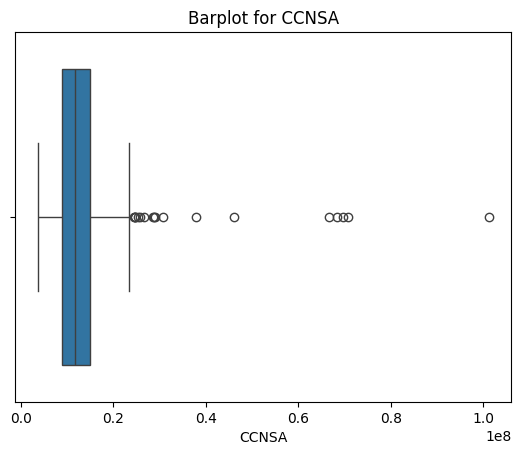

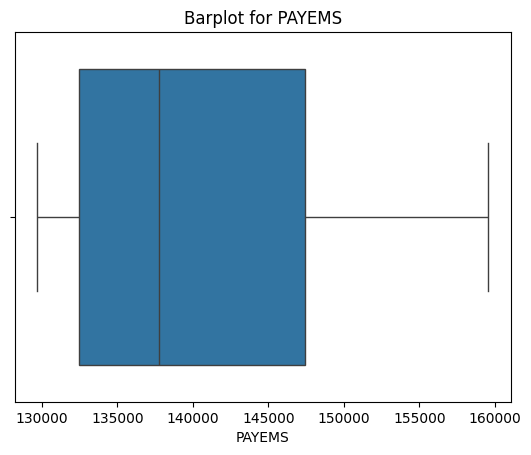

In [25]:
#identifying the outliers using the boxplot
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = ['UNRATE','JTSJOL','CIVPART','ICSA','ICNSA','CCSA','CCNSA','PAYEMS']
for feature in feature_names:
    sns.boxplot(data = df, x = feature)
    plt.title(f'Barplot for {feature}')
    plt.show()

<Axes: xlabel='ICSA', ylabel='Count'>

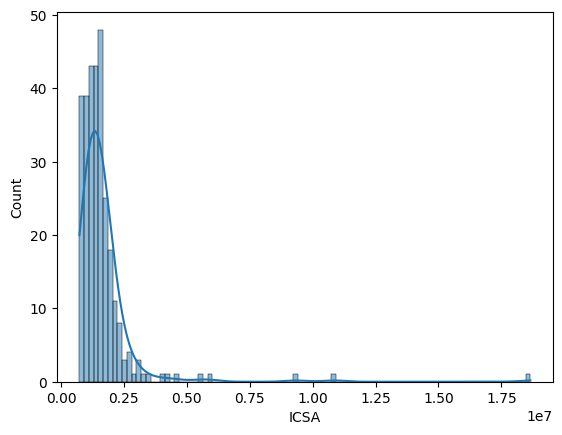

In [26]:
sns.histplot(df['ICSA'], kde=True)

In [27]:
#handling the outliers using the winsorization technique
for feature in feature_names:
    lower_limit = df[feature].quantile(0.05)
    upper_limit = df[feature].quantile(0.95)
    df[feature] = df[feature].clip(lower=lower_limit, upper=upper_limit)

C:\Users\jaswe\AppData\Local\Temp\ipykernel_36192\995403403.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].clip(lower=lower_limit, upper=upper_limit)


##Feature Engineering

In [28]:
#Creating the lag features
for feature in feature_names:
    for lag in range(1, 5):
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
    #Creating the rolling mean features
    for window in [3, 6]:
        df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(window=window).mean()
        df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(window=window).std()
#Dropping the null values created by the lag and rolling features
df.dropna(inplace=True)

In [29]:
df.columns

Index(['observation_date', 'UNRATE', 'JTSJOL', 'CIVPART', 'ICSA', 'ICNSA',
       'CCSA', 'CCNSA', 'PAYEMS', 'UNRATE_lag_1', 'UNRATE_lag_2',
       'UNRATE_lag_3', 'UNRATE_lag_4', 'UNRATE_rolling_mean_3',
       'UNRATE_rolling_std_3', 'UNRATE_rolling_mean_6', 'UNRATE_rolling_std_6',
       'JTSJOL_lag_1', 'JTSJOL_lag_2', 'JTSJOL_lag_3', 'JTSJOL_lag_4',
       'JTSJOL_rolling_mean_3', 'JTSJOL_rolling_std_3',
       'JTSJOL_rolling_mean_6', 'JTSJOL_rolling_std_6', 'CIVPART_lag_1',
       'CIVPART_lag_2', 'CIVPART_lag_3', 'CIVPART_lag_4',
       'CIVPART_rolling_mean_3', 'CIVPART_rolling_std_3',
       'CIVPART_rolling_mean_6', 'CIVPART_rolling_std_6', 'ICSA_lag_1',
       'ICSA_lag_2', 'ICSA_lag_3', 'ICSA_lag_4', 'ICSA_rolling_mean_3',
       'ICSA_rolling_std_3', 'ICSA_rolling_mean_6', 'ICSA_rolling_std_6',
       'ICNSA_lag_1', 'ICNSA_lag_2', 'ICNSA_lag_3', 'ICNSA_lag_4',
       'ICNSA_rolling_mean_3', 'ICNSA_rolling_std_3', 'ICNSA_rolling_mean_6',
       'ICNSA_rolling_std_6', 'CCSA_

In [30]:

df['observation_date'] = pd.to_datetime(df['observation_date'])

In [31]:
df['month'] = df['observation_date'].dt.month
df['year'] = df['observation_date'].dt.year
df['quarter'] = df['observation_date'].dt.quarter
df.drop('observation_date', inplace= True, axis =1)

In [32]:
df.columns

Index(['UNRATE', 'JTSJOL', 'CIVPART', 'ICSA', 'ICNSA', 'CCSA', 'CCNSA',
       'PAYEMS', 'UNRATE_lag_1', 'UNRATE_lag_2', 'UNRATE_lag_3',
       'UNRATE_lag_4', 'UNRATE_rolling_mean_3', 'UNRATE_rolling_std_3',
       'UNRATE_rolling_mean_6', 'UNRATE_rolling_std_6', 'JTSJOL_lag_1',
       'JTSJOL_lag_2', 'JTSJOL_lag_3', 'JTSJOL_lag_4', 'JTSJOL_rolling_mean_3',
       'JTSJOL_rolling_std_3', 'JTSJOL_rolling_mean_6', 'JTSJOL_rolling_std_6',
       'CIVPART_lag_1', 'CIVPART_lag_2', 'CIVPART_lag_3', 'CIVPART_lag_4',
       'CIVPART_rolling_mean_3', 'CIVPART_rolling_std_3',
       'CIVPART_rolling_mean_6', 'CIVPART_rolling_std_6', 'ICSA_lag_1',
       'ICSA_lag_2', 'ICSA_lag_3', 'ICSA_lag_4', 'ICSA_rolling_mean_3',
       'ICSA_rolling_std_3', 'ICSA_rolling_mean_6', 'ICSA_rolling_std_6',
       'ICNSA_lag_1', 'ICNSA_lag_2', 'ICNSA_lag_3', 'ICNSA_lag_4',
       'ICNSA_rolling_mean_3', 'ICNSA_rolling_std_3', 'ICNSA_rolling_mean_6',
       'ICNSA_rolling_std_6', 'CCSA_lag_1', 'CCSA_lag_2', 'CCSA

In [33]:
y = df['UNRATE']
X = df.iloc[:,1:]

In [34]:
#Dividing the data using the Timeseries split to avoid datalekage
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    print(f'Xtrain leng is {X_train.shape}, Xtest leng is {X_test.shape}')
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Xtrain leng is (50, 74), Xtest leng is (48, 74)
Xtrain leng is (98, 74), Xtest leng is (48, 74)
Xtrain leng is (146, 74), Xtest leng is (48, 74)
Xtrain leng is (194, 74), Xtest leng is (48, 74)
Xtrain leng is (242, 74), Xtest leng is (48, 74)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [36]:
print(X_train_scaled.shape, y_train.shape)

(242, 74) (242,)


In [37]:
#generating the aplhas from 0.001 to 1000
aplhas = np.logspace(-3, 3, 20)
model = RidgeCV(aplhas, cv = TimeSeriesSplit(5), scoring = 'r2')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f'Best alpha: {model.alpha_}')
print(f'r2_score:{r2}')
print(f'rootmeansquare: {rmse}')

Best alpha: 0.07847599703514611
r2_score:0.9343710551910228
rootmeansquare: 0.009757747974723627


In [38]:
import mlflow
from mlflow.tracking import MlflowClient
with mlflow.start_run() as run:
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_metric("r2_score", r2)  # ✅ Ensure primitive type
    run_id = run.info.run_id

# Register a new model version
model_uri = f"runs:/{run_id}/model"
client = MlflowClient()
client.create_model_version("FinalRidgeModel", model_uri, run_id)

2025/07/06 19:33:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/06 19:33:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<ModelVersion: aliases=[], creation_timestamp=1751844833143, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1751844833143, metrics=None, model_id=None, name='FinalRidgeModel', params=None, run_id='db691af175924fdc8f9d65a6aecc900e', run_link=None, source='runs:/db691af175924fdc8f9d65a6aecc900e/model', status='READY', status_message=None, tags={}, user_id=None, version=6>

In [89]:
mlflow.sklearn.log_model(model, 'Ridge Model')
mlflow.end_run()

2025/07/06 18:59:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/06 18:59:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [81]:
mlflow.end_run()

In [40]:
#checking the Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_scaled_for_VIF = scaler.fit_transform(X)

X_vif = pd.DataFrame(X_scaled_for_VIF, columns=X.columns)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

c:\Users\jaswe\OneDrive\Desktop\opt\Projects\UnEmployment_Rate_Prediction\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Feature       VIF
0                  JTSJOL       inf
1                 CIVPART       inf
2                    ICSA       inf
3                   ICNSA       inf
4                    CCSA       inf
..                    ...       ...
30  CIVPART_rolling_std_6  7.568898
44    ICNSA_rolling_std_3  6.026266
60    CCNSA_rolling_std_3  5.969483
20   JTSJOL_rolling_std_3  5.016214
28  CIVPART_rolling_std_3  3.870022

[74 rows x 2 columns]


In [42]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(alphas=np.logspace(-3,3,50), cv = TimeSeriesSplit(5), max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_score_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
non_zero_coeffs = np.sum(lasso_model.coef_!=0)

print(f'R2 score of lasso is {r2_score_lasso}')
print(f'mean_squared_error for lasso is {mse_lasso}')
print(f'root mean_squared_error for lasso is {rmse_lasso}')
print(f'best alpa (hyperparameter is {lasso_model.alpha_})')
print(f'no of most useful features for Lasso model are {non_zero_coeffs} ')

R2 score of lasso is 0.9212355334676018
mean_squared_error for lasso is 0.01171074464207393
root mean_squared_error for lasso is 0.10821619399181405
best alpa (hyperparameter is 0.001)
no of most useful features for Lasso model are 31 


In [44]:
data = pd.concat([X, y], axis=1)
correlation_matrix = data.corr()

In [45]:
print(correlation_matrix[y.name].sort_values(ascending=False))

UNRATE                   1.000000
UNRATE_rolling_mean_3    0.987871
UNRATE_lag_1             0.981311
UNRATE_rolling_mean_6    0.958973
UNRATE_lag_2             0.955051
                           ...   
PAYEMS_rolling_mean_6   -0.667545
PAYEMS_lag_2            -0.672507
PAYEMS_lag_1            -0.687823
PAYEMS_rolling_mean_3   -0.690036
PAYEMS                  -0.699643
Name: UNRATE, Length: 75, dtype: float64


In [46]:
!pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.7 MB 11.7 MB/s eta 0:00:02
   ------- --

In [90]:
import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

mlflow.start_run()
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4]
}

dt_model = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_dt = best_model.predict(X_test)

r2_score_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

mlflow.log_metric('r2_score for decision tree', r2_score_dt)
mlflow.log_metric('root_mean_squared_error_decision_tree', rmse_dt)

mlflow.log_params(grid_search.best_params_)
mlflow.sklearn.log_model(best_model,"Decision tree Model")

mlflow.end_run()

print(f'R2 score for Decsison tree:{r2_score_dt:.4f}')
print(f'RMSE for Decision Tree {rmse_dt:.4f}')
print(f'best params: {grid_search.best_params_}')



2025/07/06 18:59:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/06 18:59:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


R2 score for Decsison tree:0.6903
RMSE for Decision Tree 0.2146
best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [91]:
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: file:///c:/Users/jaswe/OneDrive/Desktop/opt/Projects/UnEmployment_Rate_Prediction/mlruns


In [92]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [48]:
mlflow.set_tag("model_type", "Decesion tree")
mlflow.set_tag("notes", "Baseline tree model shows underfitting")

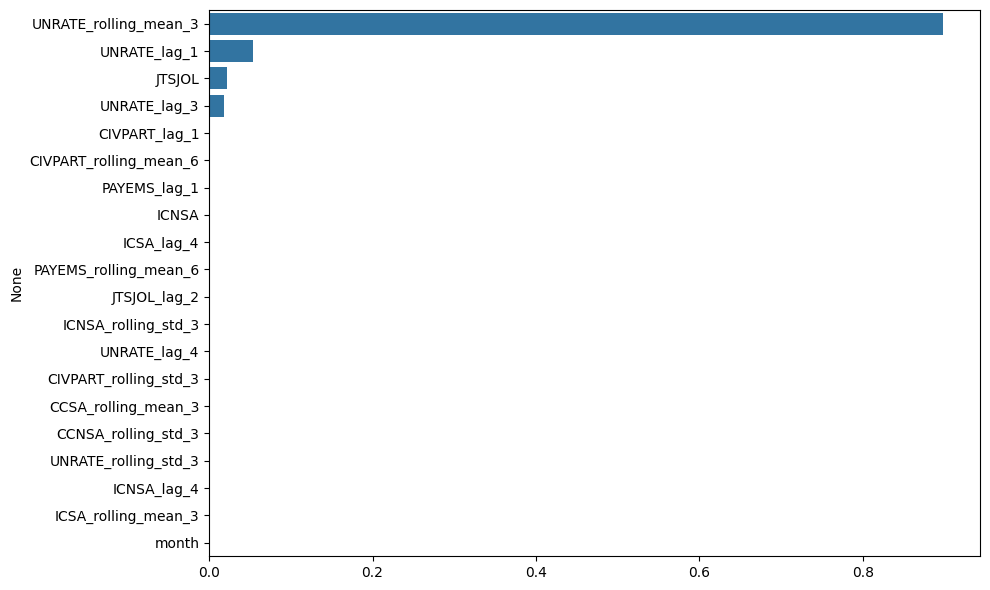

In [51]:
feature_importance = pd.Series(best_model.feature_importances_, index = X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.tight_layout()
plt.savefig("dtree_feature_importance.png")
mlflow.log_artifact("dtree_feature_importance.png")
plt.show()

In [54]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor



param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf':[1,2]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv = TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

r2_score_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mlflow.set_tag('model_type', 'Random Forest Tree')
best_params = grid_search_rf.best_params_
mlflow.log_metric('r2_score_random_forest', r2_score_rf)
mlflow.log_metric('rmse_rf', rmse_rf)
mlflow.sklearn.log_model(best_model_rf,'Random Forest Model')

mlflow.end_run()

print(f'R2 score for Decsison tree:{r2_score_rf:.4f}')
print(f'RMSE for Decision Tree {rmse_rf:.4f}')
print(f'best params: {grid_search_rf.best_params_}')



2025/07/04 18:39:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/04 18:39:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


R2 score for Decsison tree:0.7152
RMSE for Decision Tree 0.2058
best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [55]:
!pip install xgboost

In [ ]:
import mlflow.sklearn
from xgboost import XGBRegressor


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1]
}

xgr = XGBRegressor(objective='reg:squarederror', random_state = 42)
grid_search_xgr = GridSearchCV(estimator=xgr, param_grid=param_grid, cv = TimeSeriesSplit(5), scoring= 'neg_mean_squared_error',n_jobs = -1)

grid_search_xgr.fit(X_train, y_train)

best_model_xgr = grid_search_xgr.best_estimator_

y_pred_xgr = best_model_xgr.predict(X_test)

r2_score_xgr = r2_score(y_test, y_pred_xgr)
rmse_xgr = np.sqrt(mean_squared_error(y_test, y_pred_xgr))
mlflow.set_tag('model',"XGBRegressor")
mlflow.log_param('Best Paramter',grid_search_xgr.best_params_)
mlflow.log_metric('R2score for XGBregressor', r2_score_xgr)
mlflow.log_metric('RMSE for XGBRegressor', rmse_xgr)
mlflow.sklearn.log_model(best_model_xgr, "XGBRegressor Model")



MlflowException: Changing param values is not allowed. Param with key='Best Paramter' was already logged with value='{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}' for run ID='0e1d2dcfee7f4311bc490ae16bb30517'. Attempted logging new value '{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.01, 'subsample': 0.7}'.

The cause of this error is typically due to repeated calls
to an individual run_id event logging.

Incorrect Example:
---------------------------------------
with mlflow.start_run():
    mlflow.log_param("depth", 3)
    mlflow.log_param("depth", 5)
---------------------------------------

Which will throw an MlflowException for overwriting a
logged parameter.

Correct Example:
---------------------------------------
with mlflow.start_run():
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 3)
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 5)
---------------------------------------

Which will create a new nested run for each individual
model and prevent parameter key collisions within the
tracking store.

In [59]:
print(f"Best Params: {grid_search_xgr.best_params_}")
print(f"R² Score: {r2_score_xgr:.4f}")
print(f"RMSE: {rmse_xgr:.4f}")

Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.01, 'subsample': 0.7}
R² Score: 0.5932
RMSE: 0.2459


In [60]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.2 MB/s eta 0:00:00


In [66]:
mlflow.end_run()

In [67]:
from lightgbm import LGBMRegressor
import mlflow.sklearn
mlflow.start_run()
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'num_leaves': [15, 31, 50, 100],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}
lgbmr = LGBMRegressor( random_state = 42)
grid_search_lgbmr = GridSearchCV(estimator= lgbmr, param_grid=param_grid, cv= TimeSeriesSplit(5), scoring = 'neg_mean_squared_error', n_jobs=-1)
grid_search_lgbmr.fit(X_train, y_train)
model = grid_search_lgbmr.best_estimator_
y_pred_lgbmr = model.predict(X_test)

r2_score_lgbmr = r2_score(y_test, y_pred_lgbmr)
rmse_lgbmr = np.sqrt(mean_squared_error(y_test, y_pred_lgbmr))
mlflow.set_tag("model_type", "LightGBM")
mlflow.log_params(grid_search_lgbmr.best_params_)
mlflow.log_metric("r2_score", r2_score_lgbmr)
mlflow.log_metric("rmse", rmse_lgbmr)
mlflow.sklearn.log_model(model, "LightGBM")
mlflow.end_run()

print(f"Best Params: {grid_search_lgbmr.best_params_}")
print(f"R² Score: {r2_score_lgbmr:.4f}")
print(f"RMSE: {rmse_lgbmr:.4f}")


2025/07/06 16:52:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/06 16:52:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 15, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.7}
R² Score: 0.4394
RMSE: 0.2887


In [39]:
# Promote the new version
client.transition_model_version_stage(
    name="FinalRidgeModel",
    version=6,  # Replace with actual version
    stage="Production"
)

C:\Users\jaswe\AppData\Local\Temp\ipykernel_36192\2608712997.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1751844833143, current_stage='Production', deployment_job_state=None, description=None, last_updated_timestamp=1751844877427, metrics=None, model_id=None, name='FinalRidgeModel', params=None, run_id='db691af175924fdc8f9d65a6aecc900e', run_link=None, source='runs:/db691af175924fdc8f9d65a6aecc900e/model', status='READY', status_message=None, tags={}, user_id=None, version=6>

In [40]:
from mlflow.sklearn import load_model
model = load_model('models:/FinalRidgeModel/Production')

c:\Users\jaswe\OneDrive\Desktop\opt\Projects\UnEmployment_Rate_Prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
last_6_rows = X_train.tail(6)
last_6_rows.to_csv('app/history_cache.csv', mode='w', header=True, index=False)

In [48]:
X_test.head()

,JTSJOL,CIVPART,ICSA,ICNSA,CCSA,CCNSA,PAYEMS,UNRATE_lag_1,UNRATE_lag_2,UNRATE_lag_3,...,PAYEMS_lag_2,PAYEMS_lag_3,PAYEMS_lag_4,PAYEMS_rolling_mean_3,PAYEMS_rolling_std_3,PAYEMS_rolling_mean_6,PAYEMS_rolling_std_6,month,year,quarter
247,10676.9,61.8,1850000,1849796.0,15054000.0,15414223.0,146759.0,5.9,5.8,6.1,...,145032.0,144611.0,144246.0,145873.000000,864.378968,144983.000000,1182.275433,7,2021,3
248,10676.9,61.7,1440000,1222486.0,11145000.0,10947801.0,147246.0,5.4,5.9,5.8,...,145828.0,145032.0,144611.0,146611.000000,720.492193,145620.333333,1203.009670,8,2021,3
249,10676.9,61.7,1422000,1159309.0,10892000.0,9746224.0,147712.0,5.1,5.4,5.9,...,146759.0,145828.0,145032.0,147239.000000,476.538561,146198.000000,1242.597763,9,2021,3
250,10676.9,61.8,1424000,1288766.0,11800000.0,10242040.0,148569.0,4.7,5.1,5.4,...,147246.0,146759.0,145828.0,147842.333333,671.060603,146857.666667,1281.589430,10,2021,4
251,10676.9,61.9,946000,966900.0,7694000.0,7122315.0,149206.0,4.5,4.7,5.1,...,147712.0,147246.0,146759.0,148495.666667,749.694827,147553.333333,1223.948964,11,2021,4
